In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
#import cv2
import time
import sys

In [8]:
#open csv file  ,error_bad_lines=True, , encoding='utf-8'
#df=pd.read_csv('../input/mvsa-single-masterfile/MVSA_single_masterfile.csv')
#df=pd.read_csv('/kaggle/input/mvsa-attributes/mvsa_attr_info1.csv')
df=pd.read_csv('/kaggle/input/imdb-af-tb-vd/imdb_dataset_af_tb_vd.csv')
#df1=pd.read_csv('tweet13_test.csv', encoding='latin-1', error_bad_lines= False)
#df['text'].replace('', np.nan, inplace=True)

#df=df.dropna()
#print(df)

In [3]:
d[:2]

,review,sentiment,ctext,ruPolarity,tb,ruvsentiment,vd,ruafin_score,afc,af
0,one of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,0.023433,Positive,"{'neg': 0.199, 'neu': 0.744, 'pos': 0.057, 'co...",Negative,-42.0,Negative,Negative
1,a wonderful little production the filming tech...,positive,a wonderful little production the filming tech...,0.111490,Positive,"{'neg': 0.054, 'neu': 0.757, 'pos': 0.188, 'co...",Positive,13.0,Positive,Positive


In [17]:
#'''
!pip install text_hammer
#preproccesing for cleaning
#%%time
import text_hammer as th
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
#     df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
#     df[column] = df[column].progress_apply(lambda x: ps.remove_stopwords(x))

    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
#     df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    #return(df)
    return(df[column])
d['ctext']=text_preprocessing(d,'review')
d[:2]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

,review,sentiment,ctext
0,one of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,a wonderful little production the filming tech...,positive,a wonderful little production the filming tech...


In [18]:
#df['ctext']=df['review']
df[:10]

,review,sentiment,ctext
0,one of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,a wonderful little production the filming tech...,positive,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,basically theres a family where a little boy j...,negative,basically theres a family where a little boy j...
4,petter matteis love in the time of money is a ...,positive,petter matteis love in the time of money is a ...
5,probably my alltime favorite movie a story of ...,positive,probably my alltime favorite movie a story of ...
6,i sure would like to see a resurrection of a u...,positive,i sure would like to see a resurrection of a u...
7,this show was an amazing fresh innovative idea...,negative,this show was an amazing fresh innovative idea...
8,encouraged by the positive comments about this...,negative,encouraged by the positive comments about this...
9,if you like original gut wrenching laughter yo...,positive,if you like original gut wrenching laughter yo...


In [17]:
sid = SIA()
sid.polarity_scores('hair long')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [21]:
afn = Afinn()
afn.score('sign white')


0.0

In [10]:
TextBlob('woman smiling').sentiment.polarity

0.0

          label                                               text Unnamed: 2

0      negative  dear @Microsoft the newOoffice for Mac is grea...        NaN

1      negative  @Microsoft how about you make a system that do...        NaN

2      negative  I may be ignorant on this issue but... should ...        NaN

3      negative  Thanks to @microsoft, I just may be switching ...        NaN

4       neutral  If I make a game as a #windows10 Universal App...        NaN

...         ...                                                ...        ...

28461  positive  I need to become a celebrity so I can just be ...        NaN

28462  positive         Snoop dogg may be the funniest human alive        NaN

28463   neutral  I'm only ok with 3rd floor playing Snoop Dogg ...        NaN

28464  positive  SNOOP DOGG AKA SNOOPADELIC friday friday only ...        NaN

28465  positive  I can't stop thinking about the fact that I'm ...        NaN



[28466 rows x 3 columns]


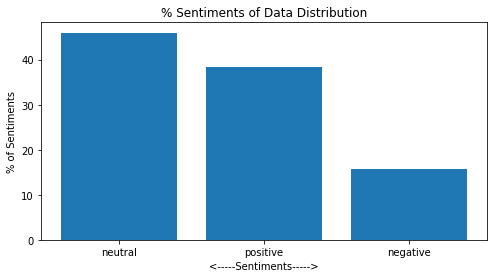

In [5]:
#val_countl = df1.groupby(['label']).count()
#val_counttb = df1.groupby(['tb']).count()
#val_countvd = df1.groupby(['vd']).count()
#val_countaf = df1.groupby(['af']).count()
#df.drop(df.head(5000).index,inplace = True)
#df.drop(df.tail(5000).index,inplace = True)
#df=df[df['lang']=='en']
#df.drop(['text'], axis='columns', inplace=True)
#df.drop(['retweeted_status-text','lang'], axis='columns', inplace=True)
#df.drop(['lang'], axis='columns', inplace=True)
#df['text'].replace('', np.nan, inplace=True)
#df=df.dropna()
#df=df.drop_duplicates()
#df['text']=df['text'].apply(lambda txt: ''.join(TextBlob(txt).correct()))
#print(df)


         label          id                     date_time  NO_QUERY  \

0            0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   

1            0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   

2            0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

3            0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

4            0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   

...        ...         ...                           ...       ...   

1048570      4  1960186342  Fri May 29 07:33:44 PDT 2009  NO_QUERY   

1048571      4  1960186409  Fri May 29 07:33:43 PDT 2009  NO_QUERY   

1048572      4  1960186429  Fri May 29 07:33:44 PDT 2009  NO_QUERY   

1048573      4  1960186445  Fri May 29 07:33:44 PDT 2009  NO_QUERY   

1048574      4  1960186607  Fri May 29 07:33:45 PDT 2009  NO_QUERY   



               user_name                                               text  \

0          scotthamilton  is upset that he can't update his Facebo

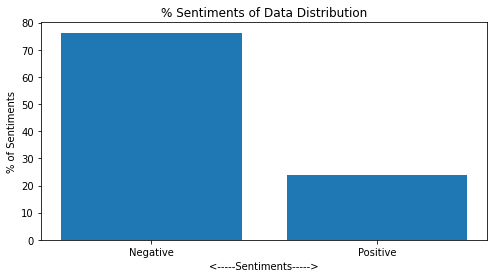

In [5]:
def getAnalysis(score):
    if score == 0:
        return 'Negative'
    else:
        return 'Positive'
    
df1['label']=df1['label'].apply(getAnalysis)
val_count = ((df1['label1'].value_counts()/df1.shape[0])*100)
#vacine.plot(figsize=(16, 4), kind='bar', x='Vaccine_name', y='% of frequency', title='Covid19 Vaccine 2020')
plt.figure(figsize=(8,4))
plt.xlabel('<-----Sentiments----->')
plt.ylabel('% of Sentiments')
plt.bar(val_count.index, val_count.values)
plt.title("% Sentiments of Data Distribution")
  
print(df1)

In [5]:
!pip install afinn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=fe02e7cb4ea75bfbce11d611a4d5ee3b8adc1c9bed41d11e2f8afb3fe7f9e1a4
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
#from wordcloud import WordCloud, STOPWORDS
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
from nltk.corpus import stopwords
from textblob import TextBlob
from afinn import Afinn 
import string
import re

In [14]:
#remove user and rt
#text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
def remove_user(text, pattern):
    #text = re.sub(text_cleaning_re, ' ', str(text)).strip()
    #text = ''.join([i for i in text if not i.isdigit()])#remove the digit
    r = re.findall(pattern, text)
    for i in r:
        text = re.sub(i, '', text)
    return text    

#df['wrt_text'] = np.vectorize(remove_user)(df['text_x'], "RT[\s]") 
df['text'] = np.vectorize(remove_user)(df['ctext'], "rt[\s]") 
print(df)

TypeError: expected string or bytes-like object

In [11]:
#remove user and rt
#text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
def remove_user(text, pattern):
    #text = re.sub(text_cleaning_re, ' ', str(text)).strip()
    #text = ''.join([i for i in text if not i.isdigit()])#remove the digit
    r = re.findall(pattern, text)
    for i in r:
        text = re.sub(i, '', text)
    return text    

#df['ruser'] = np.vectorize(remove_user)(df['wrt_text'], "#[\w]*") 
df['rpun'] = np.vectorize(remove_user)(df['ruser'], "@[\w]*") 
print(df)


        ID                                             text_x text_label  \
0        1      How I feel today #legday #jelly #aching #gym     neutral   
1        2  grattis min griskulting!!!???? va bara tvungen...    neutral   
2        3  RT @polynminion: The moment I found my favouri...    neutral   
3        4  #escort We have a young and energetic team and...   positive   
4        5  RT @chrisashaffer: Went to SSC today to be a "...   positive   
...    ...                                                ...        ...   
4696  5125             http://t.co/Y4ZrSmq2KB http://t.co/L¡­    neutral   
4697  5126  YES! #sinful #food #freefrom #glutenfree #suga...   positive   
4698  5127  RT @bookmyshow: #Disney's lies - "Every day is...   positive   
4699  5128  RT @MUBMI: TWO MORE DAYS to submit your apps #...    neutral   
4700  5129  RT @khununeos: khun was literally me whenever ...   positive   

     image_label                                              ctext  img_path  \
0     

In [17]:
#Remove English stopwords and puntuation and lowercase
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    #text = (text.lower())
    text = ''.join([i for i in text if not i.isdigit()])#remove the digit
    text = re.sub(r'\b\w{0,1}\b', '', str(text))#remove the word less than 3 letters
    tokens = []
    for token in text.split():
        if token not in stop_words:
            tokens.append(token)
    return " ".join(tokens)
df['reswpd'] = df['ruser'].apply(lambda x: preprocess(x))
#print(df)

In [17]:
#df.to_csv('2flair_label.csv',index=False)

In [18]:
#remove the words = ['pfizer', 'corona', 'coronavirus','biontech','covid19','covid','vaccine','moderna','vacuna'etc..] 
stopwords = ['tiktok','astra', 'zeneca','fuck','bitch','dick','fucking','sex','vaginal','shit',] 
def preprocess_word(text, stem=False):
    
    text = ''.join([i for i in text if not i.isdigit()])#remove the digit
    text = re.sub(r'\b\w{0,1}\b', '', str(text))#remove the word less than 3 letters
    tokens = []
    for token in text.split():
        if token not in stopwords:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
            #tokens.append(token)
    return " ".join(tokens)
#df['rsw_stema'] = df['stema'].apply(lambda x: preprocess_word(x))
df['ctext'] = df['reswpd'].apply(lambda x: preprocess_word(x))
#print(df)

In [19]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
#text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
def lemmatizer_word(text, stem=True):
    #text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    #text = re.sub(text_cleaning_re, ' ', str(text)).strip()
    #text = ''.join([i for i in text if not i.isdigit()])#remove the digit
    #text=re.sub(r'@[\w]+[0-9]', '',str(text))#remove the digit
    #text = re.sub(r'\b\w{0,1}\b', '', str(text))#remove the word less than 3 letters
    tokens = []
    for token in text.split():
         if token not in stop_words:
            if stem:
                #tokens.append(stemmer.stem(token))
                tokens.append(lemmatizer.lemmatize(token))
            
            else:
                tokens.append(token)
    return " ".join(tokens)
#df['lema'] = df['ruser'].apply(lambda x: lemmatizer_word(x))
df['ltext'] = df['reswpd'].apply(lambda x: lemmatizer_word(x))
#df['ctext'] = df['ruser'].apply(lambda x: lemmatizer_word(x))
print(df)

        label                                               text  \

0    Positive  @stellargirl I loooooooovvvvvveee my Kindle2. ...   

1    Positive  Reading my kindle2...  Love it... Lee childs i...   

2    Positive  Ok, first assesment of the #kindle2 ...it fuck...   

3    Positive  @kenburbary You'll love your Kindle2. I've had...   

4    Positive  @mikefish  Fair enough. But i have the Kindle2...   

..        ...                                                ...   

493   Neutral  Ask Programming: LaTeX or InDesign?: submitted...   

494  Negative  On that note, I hate Word. I hate Pages. I hat...   

495  Positive  Ahhh... back in a *real* text editing environm...   

496  Negative  Trouble in Iran, I see. Hmm. Iran. Iran so far...   

497  Negative  Reading the tweets coming out of Iran... The w...   



                                              wrt_text  \

0    @stellargirl I loooooooovvvvvveee my Kindle2. ...   

1    Reading my kindle2...  Love it... Lee childs i.

In [17]:
#from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
sid = SIA()
sid.polarity_scores('tree brown woman long woman smiling hair long  head smiling sunglass black shadow blue')
afn = Afinn()
afn.score(' t
TextBlob(' tree brown

{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.7184}

In [9]:
afn = Afinn()
afn.score(' tree brown woman long woman smiling hair long  head smiling sunglass black shadow blue')

4.0

In [10]:
TextBlob(' tree brown woman long woman smiling hair long  head smiling sunglass black shadow blue').sentiment.polarity

-0.06666666666666667

In [12]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-cased')
#unmasker("Hello I'm a [MASK] model.")
unmasker("tree brown woman long woman smiling hair long  head smiling sunglass black shadow blue[MASK].")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

2022-11-20 23:06:34.465326: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

[{'score': 0.7920880317687988,
  'token': 1257,
  'token_str': 'eyes',
  'sequence': 'tree brown woman long woman smiling hair long head smiling sunglass black shadow blue eyes.'},
 {'score': 0.03386303409934044,
  'token': 2552,
  'token_str': 'eye',
  'sequence': 'tree brown woman long woman smiling hair long head smiling sunglass black shadow blue eye.'},
 {'score': 0.018738415092229843,
  'token': 1339,
  'token_str': 'face',
  'sequence': 'tree brown woman long woman smiling hair long head smiling sunglass black shadow blue face.'},
 {'score': 0.017046364024281502,
  'token': 2003,
  'token_str': 'smile',
  'sequence': 'tree brown woman long woman smiling hair long head smiling sunglass black shadow blue smile.'},
 {'score': 0.014552230015397072,
  'token': 1590,
  'token_str': 'woman',
  'sequence': 'tree brown woman long woman smiling hair long head smiling sunglass black shadow blue woman.'}]

Text(0.5, 1.0, '% Sentiments of Data Distribution')

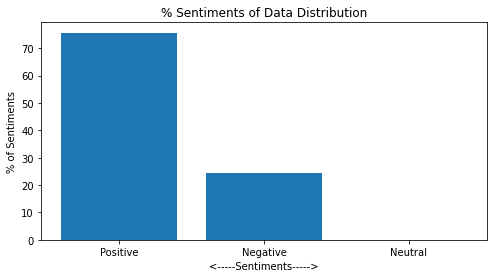

In [24]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['ruPolarity']=df['ctext'].apply(getPolarity)
#print(df)
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['tb']=df['ruPolarity'].apply(getAnalysis)
#print(df)

val_count = ((df['tb'].value_counts()/df.shape[0])*100)
#vacine.plot(figsize=(16, 4), kind='bar', x='Vaccine_name', y='% of frequency', title='Covid19 Vaccine 2020')
plt.figure(figsize=(8,4))
plt.xlabel('<-----Sentiments----->')
plt.ylabel('% of Sentiments')
plt.bar(val_count.index, val_count.values)
plt.title("% Sentiments of Data Distribution")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Text(0.5, 1.0, '% Sentiments of Data Distribution')

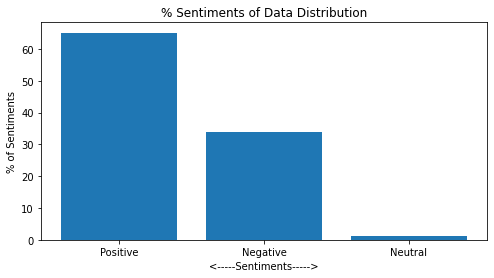

In [26]:
#from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk
nltk.download('vader_lexicon')
sid = SIA()
df['ruvsentiment']           = df['ctext'].apply(lambda x: sid.polarity_scores(x))

def score_sent(sentiments):
    if sentiments['compound'] >= 0.05 : 
        return "Positive" 
  
    elif sentiments['compound'] <= - 0.05 : 
        return "Negative" 
  
    else : 
        return "Neutral" 
#print(sid.polarity_scores('ruined'))
df['vd']=df['ruvsentiment'].apply(score_sent)

#print(df)
val_count = ((df['vd'].value_counts()/df.shape[0])*100)
#vacine.plot(figsize=(16, 4), kind='bar', x='Vaccine_name', y='% of frequency', title='Covid19 Vaccine 2020')
plt.figure(figsize=(8,4))
plt.xlabel('<-----Sentiments----->')
plt.ylabel('% of Sentiments')
plt.bar(val_count.index, val_count.values)
plt.title("% Sentiments of Data Distribution")

In [18]:
df['ctext'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  4701 non-null   int64 
 1   text_x              4701 non-null   object
 2   text_label          4701 non-null   object
 3   image_label         4701 non-null   object
 4   ctext               4696 non-null   object
 5   img_path            4701 non-null   object
 6   object_list         3992 non-null   object
 7   object_score        4701 non-null   object
 8   bbox                4701 non-null   object
 9   classes             4701 non-null   object
 10  number_of_bbox      4701 non-null   int64 
 11  number_of_classes   4701 non-null   int64 
 12  classes_with_ctext  4701 non-null   object
 13  joint_label         4352 non-null   object
 14  wrt_text            4701 non-null   object
 15  ruser               4701 non-null   object
 16  rpun                4701

                                                  review sentiment  \
0      one of the other reviewers has mentioned that ...  positive   
1      a wonderful little production the filming tech...  positive   
2      i thought this was a wonderful way to spend ti...  positive   
3      basically theres a family where a little boy j...  negative   
4      petter matteis love in the time of money is a ...  positive   
...                                                  ...       ...   
49995  i thought this movie did a down right good job...  positive   
49996  bad plot bad dialogue bad acting idiotic direc...  negative   
49997  i am a catholic taught in parochial elementary...  negative   
49998  im going to have to disagree with the previous...  negative   
49999  no one expects the star trek movies to be high...  negative   

                                                   ctext  ruPolarity  \
0      one of the other reviewers has mentioned that ...    0.023433   
1      a wonder

Text(0.5, 1.0, '% Sentiments of Data Distribution')

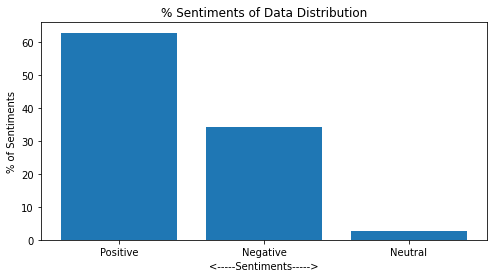

In [31]:
# compute afinn scores (polarity) and labels
#from afinn import Afinn 
afn = Afinn()
#df['ruafin_score']           = df['ruser'].apply(lambda x: afn.score(x))
df['ruafin_score']           = df['ctext'].apply(lambda x: afn.score(x))
#scores = [afn.score(article) for article in news_df]
def afine_label(score):
    if score > 0 : 
        return "Positive" 
  
    elif score < 0 : 
        return "Negative" 
  
    else : 
        return "Neutral" 
#print(sid.polarity_scores('ruined'))
df['af']=df['ruafin_score'].apply(afine_label)

print(df)
val_count = ((df['af'].value_counts()/df.shape[0])*100)
#vacine.plot(figsize=(16, 4), kind='bar', x='Vaccine_name', y='% of frequency', title='Covid19 Vaccine 2020')
plt.figure(figsize=(8,4))
plt.xlabel('<-----Sentiments----->')
plt.ylabel('% of Sentiments')
plt.bar(val_count.index, val_count.values)
plt.title("% Sentiments of Data Distribution")
  

Text(0.5, 1.0, '% Sentiments of Data Distribution')

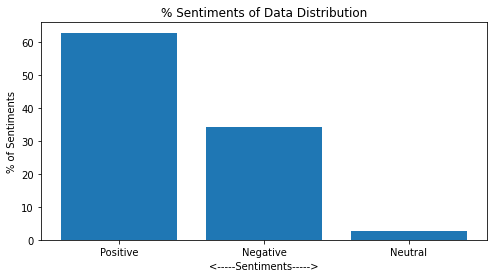

In [30]:
val_count = ((df['afc'].value_counts()/df.shape[0])*100)
#vacine.plot(figsize=(16, 4), kind='bar', x='Vaccine_name', y='% of frequency', title='Covid19 Vaccine 2020')
plt.figure(figsize=(8,4))
plt.xlabel('<-----Sentiments----->')
plt.ylabel('% of Sentiments')
plt.bar(val_count.index, val_count.values)
plt.title("% Sentiments of Data Distribution")

In [14]:
df.to_csv('./imdb_dataset_af_tb_vd.csv',index=False)

In [16]:
print(df)

          label                                               text Unnamed: 2  \

0      negative  dear @Microsoft the newOoffice for Mac is grea...        NaN   

1      negative  @Microsoft how about you make a system that do...        NaN   

2      negative  I may be ignorant on this issue but... should ...        NaN   

3      negative  Thanks to @microsoft, I just may be switching ...        NaN   

4       neutral  If I make a game as a #windows10 Universal App...        NaN   

...         ...                                                ...        ...   

28461  positive  I need to become a celebrity so I can just be ...        NaN   

28462  positive         Snoop dogg may be the funniest human alive        NaN   

28463   neutral  I'm only ok with 3rd floor playing Snoop Dogg ...        NaN   

28464  positive  SNOOP DOGG AKA SNOOPADELIC friday friday only ...        NaN   

28465  positive  I can't stop thinking about the fact that I'm ...        NaN   



              

Text(0.5, 1.0, '% Sentiments of Data Distribution')

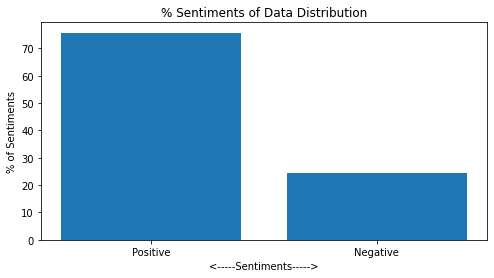

In [10]:
#Binary textblob
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['ruPolarity']=df['ctext'].apply(getPolarity)
#print(df)
def getAnalysis(score):
    if score>= 0:
        return 'Positive'
    else:
        return 'Negative'
    
df['btb']=df['ruPolarity'].apply(getAnalysis)
#print(df)

val_count = ((df['btb'].value_counts()/df.shape[0])*100)
#vacine.plot(figsize=(16, 4), kind='bar', x='Vaccine_name', y='% of frequency', title='Covid19 Vaccine 2020')
plt.figure(figsize=(8,4))
plt.xlabel('<-----Sentiments----->')
plt.ylabel('% of Sentiments')
plt.bar(val_count.index, val_count.values)
plt.title("% Sentiments of Data Distribution")

Text(0.5, 1.0, '% Sentiments of Data Distribution')

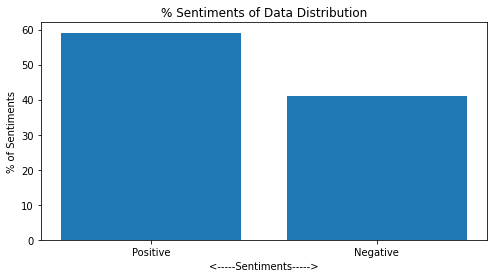

In [11]:
#Binary from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sid = SIA()
df['ruvsentiment']           = df['ctext'].apply(lambda x: sid.polarity_scores(x))

def score_sent(sentiments):
    if sentiments['compound'] >= 0.5 : 
        return "Positive" 
    else : 
        return "Negative" 
#print(sid.polarity_scores('ruined'))
df['bvd']=df['ruvsentiment'].apply(score_sent)

#print(df)
val_count = ((df['bvd'].value_counts()/df.shape[0])*100)
#vacine.plot(figsize=(16, 4), kind='bar', x='Vaccine_name', y='% of frequency', title='Covid19 Vaccine 2020')
plt.figure(figsize=(8,4))
plt.xlabel('<-----Sentiments----->')
plt.ylabel('% of Sentiments')
plt.bar(val_count.index, val_count.values)
plt.title("% Sentiments of Data Distribution")

Text(0.5, 1.0, '% Sentiments of Data Distribution')

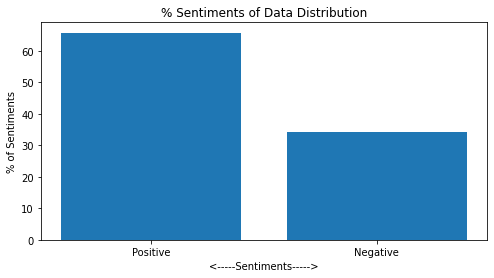

In [12]:
# #Binary compute afinn scores (polarity) and labels
#from afinn import Afinn 
afn = Afinn()
df['ruafin_score']           = df['ctext'].apply(lambda x: afn.score(x))
#scores = [afn.score(article) for article in news_df]
def afine_label(score):
    if score >=0 : 
        return "Positive" 
    else : 
        return "Negative" 
#print(sid.polarity_scores('ruined'))
df['baf']=df['ruafin_score'].apply(afine_label)

#print(df)
val_count = ((df['baf'].value_counts()/df.shape[0])*100)
#vacine.plot(figsize=(16, 4), kind='bar', x='Vaccine_name', y='% of frequency', title='Covid19 Vaccine 2020')
plt.figure(figsize=(8,4))
plt.xlabel('<-----Sentiments----->')
plt.ylabel('% of Sentiments')
plt.bar(val_count.index, val_count.values)
plt.title("% Sentiments of Data Distribution")
  

                                                     text  label  \

740000  I'm planning to buy a Dell Mini9 on next payda...      0   

740001  is is back after 1 day of not checking her acc...      0   

740002  Up taking mom to work then I have to go to wor...      0   

740003  @vickytors Boooooo being ill sucks  Haha yes I...      0   

740004                                       work till 7       0   

...                                                   ...    ...   

848570  @Scamtypes But you Twitter ...  which is bette...      4   

848571  @paul_e_wog Hell yeah I'm thoughtful. I'm awes...      4   

848572  @DarkPiano LOL..yes., it is.  Glad to hear you...      4   

848573  @C_DIG Amazingly they are still there too! I t...      4   

848574  @hollywills Oh vanilla tea sounds yummy....whe...      4   



                                                 wrt_text  \

740000  I'm planning to buy a Dell Mini9 on next payda...   

740001  is is back after 1 day of not checking

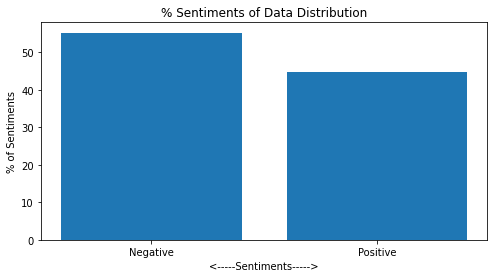

In [36]:
def getAnalysis(score):
    if score==4:
        return 'Positive'
    elif score==2:
        return 'Neutral'
    else:
        return 'Negative'
    
df['label1']=df['label'].apply(getAnalysis)
val_count = ((df['label1'].value_counts()/df.shape[0])*100)
#vacine.plot(figsize=(16, 4), kind='bar', x='Vaccine_name', y='% of frequency', title='Covid19 Vaccine 2020')
plt.figure(figsize=(8,4))
plt.xlabel('<-----Sentiments----->')
plt.ylabel('% of Sentiments')
plt.bar(val_count.index, val_count.values)
plt.title("% Sentiments of Data Distribution")
  
print(df)


In [23]:
df2=pd.DataFrame()
#df2[['ctext','tb','af','vd','label','btb','bvd','baf','m3','mv3']]=df[['ctext','tb','af','vd','label','btb','bvd','baf','m3','mv3']]
df2[['ctext','rpun','tb','af','vd','label']]=df[['ctext','rpun','tb','af','vd','label']]
#df2['text'].replace('', np.nan, inplace=True)
#df2=df2.dropna()
#df2=df2.drop_duplicates()
#print(df2)

In [24]:
#df2.to_csv('labelled_small_sentiment140.csv',index=False)
#df2.to_csv('labelled_disaster.csv',index=False)
#df2.to_csv('labelled_SemEval2016-Task6.csv',index=False)
#df2.to_csv('labelled_semeval_2016.csv',index=False)
#df2.to_csv('labbeled_test_sentiment140.csv',index=False)
df2.to_csv('labelled_t16_testdev.csv',index=False)
#df2.to_csv('labelled_tweet13_test.csv',index=False)






In [22]:
#remove punctuation and lower case
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
df['rpun'] = df['ruser'].apply(lambda x: re.sub(text_cleaning_re, ' ', str(x)).strip())
#print(df)

In [19]:
df.to_csv('labelled_t16all.csv', index=False)

In [7]:
#remove the words = ['pfizer', 'corona', 'coronavirus','biontech','covid19','covid','vaccine','moderna','vacuna'etc..] 
stopwords = ['pfizer','corona','amp','via','coronavirus','biontech','oxford','moderna','vacuna','astrazeneca','covid19',
             'covid19 vaccine','covidvaccine','vaccines','oxfordvaccine','covid','mrna','bntx','astrazenec','vaccine',
             'vacci','vac','vaxx','vaccination','vaccinate','vaccinat','coronaviru','virus','tiktok','astra', 'zeneca',
             'fuck','bitch','dick','fucking','sex','vaginal',,'shit',
             'year','time','look','news','many','time','today','even','thank','make',
             'astra','zeneca','said','take','work','know','think','base','today','need','want',
             'vacc','sputnikv','pfize','oxfordastrazeneca','astraz','novavax','alex azar','people','trump',
             'asta zeneca','vaccinated','also','coronavirusvaccine','coronavaccine','nvax biotech','biotech','astrazeneca',
             'coronavirls','coronavir','info','coronavitit','covaxin','covii','vaceine','covvi','vioxx','covin',
             'cowin','astrazenica','newsletter','vaccinating','covid','cowid','group','case','vaccin','corona','virus',
             'say','next','week','come','still','take','go','base','much','work','alreadi','first','long',
            'start','government','going','getting','pandemic','country','company','one','new','th','see',
            'dos','state','breaking','million','shot','data','month','second'] 
def preprocess_word(text):
    
    text = ''.join([i for i in text if not i.isdigit()])#remove the digit
    text = re.sub(r'\b\w{0,1}\b', '', str(text))#remove the word less than 3 letters
    tokens = []
    for token in text.split():
        if token not in stopwords:
            tokens.append(' '+token)
    return " ".join(tokens)
#df['rsw_stema'] = df['stema'].apply(lambda x: preprocess_word(x))
df['rseachw_text'] = df['stema'].apply(lambda x: preprocess_word(x))
print(df)

                                                     text  \

0       RT @EU_Commission: The European Medicines Agen...   

1       EU regulators give greenlight to Modernaâs C...   

2       RT @spectatorindex: JUST IN: EU approves use o...   

3       RT @aetiology: This is absurd. The virus doesn...   

4       RT @JordanUhl: Unbelievably stupid. https://t....   

...                                                   ...   

510120  Pretty sure Moderna pharmaceuticals wants to c...   

510131  Why exactly did our Premier call Pfizer and As...   

510133  Let me set the record straight âNear the fro...   

510135  What happens if someone refuses vaccination? E...   

510137  Exactly what he said.  Be wise with your medic...   



                                                    ruser  \

0       : The European Medicines Agency has given a po...   

1       EU regulators give greenlight to Modernaâs C...   

2       : JUST IN: EU approves use of Moderna coronavi...   

3     

In [30]:
df2.to_csv('13_03_manual_label.csv',index=False)

In [26]:
df1=pd.read_csv('13_03_clean.csv', encoding='latin-1', error_bad_lines= False)

In [29]:
df2=pd.DataFrame()
df2[['text','tblabel','aflabel','vlabel']]=df1[['rpun','rutblabel','ruaflabel','ruvlabel']]
df2['text'].replace('', np.nan, inplace=True)
df2=df2.dropna()
df2=df2.drop_duplicates()
print(df2)

                                                     text   tblabel   aflabel  \

0       The European Medicines Agency has given a posi...  Positive  Positive   

1       EU regulators give greenlight to Moderna s Cov...   Neutral   Neutral   

2       JUST IN EU approves use of Moderna coronavirus...   Neutral  Positive   

3       This is absurd The virus doesn t care who s do...  Negative   Neutral   

4                                     Unbelievably stupid  Negative  Negative   

...                                                   ...       ...       ...   

303624  Pretty sure Moderna pharmaceuticals wants to c...  Positive  Positive   

303625  Why exactly did our Premier call Pfizer and As...  Positive   Neutral   

303626  Let me set the record straight Near the front ...  Positive   Neutral   

303627  What happens if someone refuses vaccination Et...   Neutral   Neutral   

303628  Exactly what he said Be wise with your medical...  Positive   Neutral   



          vlab

In [25]:
#Stemming
def stem_word(text, stem=True):
    
    tokens = []
    for token in text.split():
        if stem:
            tokens.append(stemmer.stem(token))
        else:
            tokens.append(' '+token)
    return " ".join(tokens)
df['stem'] = df['rsword'].apply(lambda x: stem_word(x))
print(df)

                                                      text  \

0        RT @EU_Commission: The European Medicines Agen...   

2        EU regulators give greenlight to Modernaâs C...   

7        RT @spectatorindex: JUST IN: EU approves use o...   

9        RT @aetiology: This is absurd. The virus doesn...   

13       RT @JordanUhl: Unbelievably stupid. https://t....   

...                                                    ...   

1306482  Pretty sure Moderna pharmaceuticals wants to c...   

1306501  Why exactly did our Premier call Pfizer and As...   

1306503  Let me set the record straight âNear the fro...   

1306505  What happens if someone refuses vaccination? E...   

1306507  Exactly what he said.  Be wise with your medic...   



                                                     ruser  \

0        : The European Medicines Agency has given a po...   

2        EU regulators give greenlight to Modernaâs C...   

7        : JUST IN: EU approves use of Moderna corona

(-0.5, 499.5, 299.5, -0.5)

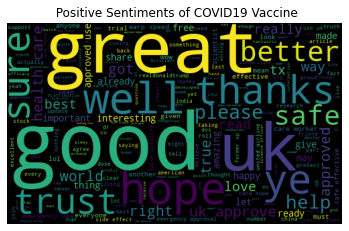

In [32]:
pos_data=df[df['sentiment']=='positive']
allWords=' '.join([twts for twts in pos_data['wstem']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.title(" Positive Sentiments of COVID19 Vaccine")
plt.imshow(wordCloud)
plt.axis("off")

(-0.5, 499.5, 299.5, -0.5)

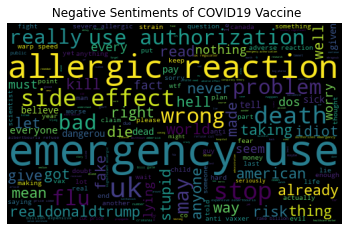

In [35]:
pos_data=df[df['sentiment']=='negative']
allWords=' '.join([twts for twts in pos_data['wstem']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.title(" Negative Sentiments of COVID19 Vaccine")
plt.imshow(wordCloud)
plt.axis("off")

(-0.5, 499.5, 299.5, -0.5)

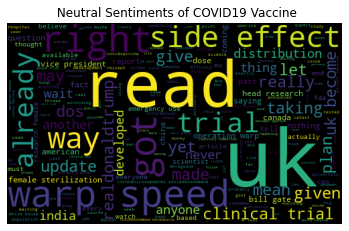

In [36]:
pos_data=df[df['sentiment']=='neutral']
allWords=' '.join([twts for twts in pos_data['wstem']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.title(" Neutral Sentiments of COVID19 Vaccine")
plt.imshow(wordCloud)
plt.axis("off")

In [31]:
def encode_score_sent(sentiments):
    if sentiments['compound'] >= 0.05 : 
        return 1 
  
    elif sentiments['compound'] <= - 0.05 : 
        return -1 
  
    else : 
        return 0 
#print(sid.polarity_scores('ruined'))
df['stem_label']=df['ssentiment'].apply(encode_score_sent)

print(df)
  

                                                      text  \

0        RT @EU_Commission: The European Medicines Agen...   

2        EU regulators give greenlight to Modernaâs C...   

7        RT @spectatorindex: JUST IN: EU approves use o...   

9        RT @aetiology: This is absurd. The virus doesn...   

13       RT @JordanUhl: Unbelievably stupid. https://t....   

...                                                    ...   

1306482  Pretty sure Moderna pharmaceuticals wants to c...   

1306501  Why exactly did our Premier call Pfizer and As...   

1306503  Let me set the record straight âNear the fro...   

1306505  What happens if someone refuses vaccination? E...   

1306507  Exactly what he said.  Be wise with your medic...   



                                                     ruser  \

0        : The European Medicines Agency has given a po...   

2        EU regulators give greenlight to Modernaâs C...   

7        : JUST IN: EU approves use of Moderna corona

In [65]:
df2['text'].replace('', np.nan, inplace=True)
df2=df2.dropna()
df2=df2.drop_duplicates()
print(df2)

                                                      text  Positive  Neutral  \

0         european  medicine  agency  given  positive  ...         1        0   

2                          eu  regulator  give  greenlight         0        1   

7                                        eu  approves  use         1        0   

9             absurd  care  documented  worker  high  risk         0        0   

13                                    unbelievably  stupid         0        0   

...                                                    ...       ...      ...   

1306482   pretty  sure  pharmaceutical  want  charge  d...         1        0   

1306501                             exactly  premier  call         0        1   

1306503   let  set  record  straight  near  front  line...         0        1   

1306505   happens  someone  refuse  ethicist  urge  cla...         0        1   

1306507                   exactly  wise  medical  decision         1        0   



         Negat

Text(0.5, 1.0, 'WordCloud of Tweet of COVID19 Vaccine')

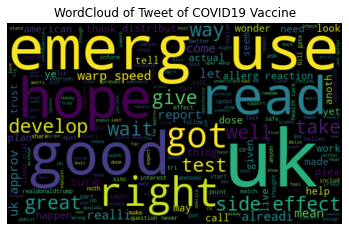

In [43]:
allWords=" ".join([twts for twts in df['lstem']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.title("WordCloud of Tweet of COVID19 Vaccine")
#plt.show()

In [23]:
df2.drop(['LPolarity','SPolarity'], axis='columns', inplace=True)
print(df2)

                                                     stext  \

0         european  medicin  agenc  given  posit  evalu...   

2                              eu  regul  give  greenlight   

7                                          eu  approv  use   

9               absurd  care  document  worker  high  risk   

13                                        unbeliev  stupid   

...                                                    ...   

1306482   pretti  sure  pharmaceut  want  charg  dose  ...   

1306501                               exact  premier  call   

1306503   let  set  record  straight  near  front  line...   

1306505   happen  someon  refus  ethicist  urg  clariti...   

1306507                          exact  wise  medic  decis   



                                                     ltext SSentiment  \

0         european  medicine  agency  given  positive  ...   Positive   

2                          eu  regulator  give  greenlight    Neutral   

7                   

In [38]:
#df=pd.read_csv('clean/2clean_for model.csv', encoding='latin-1', error_bad_lines= False)
#print(df)

In [68]:
dummy=pd.get_dummies(vd['sentiment'])
print(dummy)

         negative  neutral  positive

0               0        0         1

2               0        1         0

7               0        0         1

9               0        0         1

13              1        0         0

...           ...      ...       ...

1306482         0        0         1

1306501         0        1         0

1306503         0        0         1

1306505         0        0         1

1306507         0        0         1



[303629 rows x 3 columns]


In [69]:
marged=pd.concat([vd,dummy],axis='columns')
print(marged)

                                                      text sentiment  \

0         european  medicine  agency  given  positive  ...  positive   

2                          eu  regulator  give  greenlight   neutral   

7                                        eu  approves  use  positive   

9             absurd  care  documented  worker  high  risk  positive   

13                                    unbelievably  stupid  negative   

...                                                    ...       ...   

1306482   pretty  sure  pharmaceutical  want  charge  d...  positive   

1306501                             exactly  premier  call   neutral   

1306503   let  set  record  straight  near  front  line...  positive   

1306505   happens  someone  refuse  ethicist  urge  cla...  positive   

1306507                   exactly  wise  medical  decision  positive   



         negative  neutral  positive  

0               0        0         1  

2               0        1         0  

7 

In [70]:
#marged.drop(['Polarity','Sentiment'], axis='columns', inplace=True)
marged.drop(['sentiment'], axis='columns', inplace=True)
print(marged)

                                                      text  negative  neutral  \

0         european  medicine  agency  given  positive  ...         0        0   

2                          eu  regulator  give  greenlight         0        1   

7                                        eu  approves  use         0        0   

9             absurd  care  documented  worker  high  risk         0        0   

13                                    unbelievably  stupid         1        0   

...                                                    ...       ...      ...   

1306482   pretty  sure  pharmaceutical  want  charge  d...         0        0   

1306501                             exactly  premier  call         0        1   

1306503   let  set  record  straight  near  front  line...         0        0   

1306505   happens  someone  refuse  ethicist  urge  cla...         0        0   

1306507                   exactly  wise  medical  decision         0        0   



         posit

In [71]:
marged.to_csv('clean/fvaderws_for_model.csv',index=False)